<a href="https://colab.research.google.com/github/Loomer/2022-itc303-team08/blob/ml-manu/ml_manu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!git clone -b ml-manu https://github.com/Loomer/2022-itc303-team08.git

fatal: destination path '2022-itc303-team08' already exists and is not an empty directory.


In [92]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [93]:
import numpy as np 
import matplotlib.pyplot as pypt 
import cv2
import os 

[[[ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[ 4  0  0]
  [ 4  0  0]
  [ 4  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 ...

 [[38 35 31]
  [64 61 57]
  [85 82 78]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[40 37 33]
  [65 61 57]
  [84 81 77]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]

 [[44 41 37]
  [66 63 59]
  [86 83 78]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 1  1  1]]]


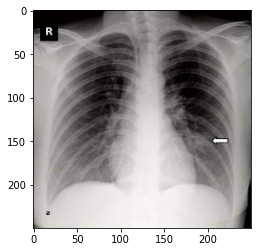

In [94]:
image_set = "/content/2022-itc303-team08/images/train"
imageType = ["COVID", "NORMAL"]
train_set = []
train_labels = []

def create_train_data():
  for imgType in imageType: 

    link = os.path.join(image_set, imgType)  
    
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue 
      img_array = cv2.imread(os.path.join(link, img))  
      new_img_array = cv2.resize(img_array, (250, 250))  
      train_set.append(new_img_array)
      train_labels.append(imageType.index(imgType)) 

create_train_data()
print(train_set[0])
pypt.imshow(train_set[0])

In [95]:
train_set = np.array(train_set)
train_labels = np.array(train_labels)
train_set = train_set/255.0

In [96]:
def create_model():
  model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (250, 250, 3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])
  
  model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [97]:
model = create_model()
model.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 187500)            0         
                                                                 
 dense_48 (Dense)            (None, 128)               24000128  
                                                                 
 dense_49 (Dense)            (None, 2)                 258       
                                                                 
Total params: 24,000,386
Trainable params: 24,000,386
Non-trainable params: 0
_________________________________________________________________


In [98]:
test_set = []
test_labels = []

test_image_set = "/content/2022-itc303-team08/images/test"

def create_test_data():
  for imgType in imageType: 

    link = os.path.join(test_image_set, imgType)  # create path to NOMRAL and COVID
        
    for img in os.listdir(link): 
      if img == "Thumbs.db":
        continue # iterate over each image
      test_img_array = cv2.imread(os.path.join(link, img))  # convert to array
      new_test_array = cv2.resize(test_img_array, (250, 250))  # resize to normalize data size
      test_set.append(new_test_array)
      test_labels.append(imageType.index(imgType)) # add this to our training_data

create_test_data()
test_labels.reverse()
test_set.reverse()
print(len(test_set))
print(test_labels)

10
[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [99]:
test_set = np.array(test_set)
test_labels = np.array(test_labels)
test_set = test_set/255.0

model.evaluate(test_set, test_labels)

1/1 [==============================] - 0s 204ms/step - loss: 0.6980 - accuracy: 0.5000


[0.6980428099632263, 0.5]

In [103]:
checkpoint_path = "2022-itc303-team08/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose =1, period = 10)

new_model = create_model()

new_model.fit(train_set, train_labels, epochs=30, validation_data = (test_set, test_labels), callbacks = [cp_callback])

!ls {checkpoint_dir}

Epoch 1/30
7/7 [==============================] - 2s 183ms/step - loss: 66.7637 - accuracy: 0.5300 - val_loss: 8.6051 - val_accuracy: 0.8000
Epoch 2/30
7/7 [==============================] - 1s 142ms/step - loss: 6.6541 - accuracy: 0.9000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
7/7 [==============================] - 1s 141ms/step - loss: 5.0122 - accuracy: 0.9050 - val_loss: 0.1402 - val_accuracy: 0.9000
Epoch 4/30
7/7 [==============================] - 1s 152ms/step - loss: 3.4535 - accuracy: 0.9600 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
7/7 [==============================] - 1s 143ms/step - loss: 2.5837 - accuracy: 0.9450 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
7/7 [==============================] - 1s 147ms/step - loss: 3.6320 - accuracy: 0.9450 - val_loss: 2.2302e-05 - val_accuracy: 1.0000
Epoch 7/30
7/7 [==============================] - 1s 141ms/step - loss: 1.8080 - accuracy: 0.9650 - val_loss: 0.0620 - val_accuracy: 1.0000
Epo

In [104]:
model = create_model()
loss, acc = model.evaluate(test_set, test_labels)
print(loss, acc)

1/1 [==============================] - 0s 211ms/step - loss: 0.7611 - accuracy: 0.5000
0.7611107230186462 0.5


In [105]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_set, test_labels)
print(loss, acc)

1/1 [==============================] - 0s 34ms/step - loss: 0.0000e+00 - accuracy: 1.0000
0.0 1.0
